In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, datasets

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images[:20000]

print (test_labels[:5])

[9 2 1 1 6]


In [17]:
# CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=16, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(model.summary())

print('Test accuracy:', test_acc)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.6638 - loss: 0.9116 - val_accuracy: 0.8167 - val_loss: 0.4751
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8465 - loss: 0.4242 - val_accuracy: 0.8518 - val_loss: 0.3908
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.8711 - loss: 0.3493 - val_accuracy: 0.8518 - val_loss: 0.3967
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8880 - loss: 0.3033 - val_accuracy: 0.8643 - val_loss: 0.3585
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9029 - loss: 0.2670 - val_accuracy: 0.8745 - val_loss: 0.3360
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8816 - loss: 0.3328


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          57,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 343,364 (1.31 MB)

 Trainable params: 114,454 (447.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 228,910 (894.18 KB)

None
Test accuracy: 0.8827999830245972


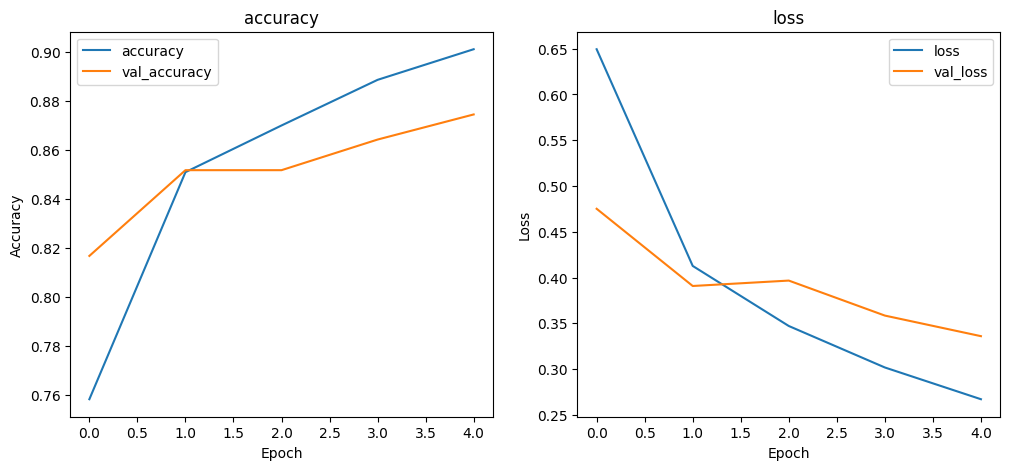

In [18]:
def plot_history (history):
  plt.figure(figsize=(12, 5))

  # 정확도 시각화
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # 손실 시각화
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.title('loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

plot_history(history)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

with_mask_folder = "/content/drive/MyDrive/Colab Notebooks/maskdetection/face_maskdetection/with_mask"
without_mask_folder = "/content/drive/MyDrive/Colab Notebooks/maskdetection/face_maskdetection/without_mask"

images = []
labels = []

for folder, label in [(with_mask_folder, 0), (without_mask_folder, 1)]:
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (56, 56))
        images.append(img)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

images.shape


KeyboardInterrupt: 

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [44]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [45]:
# CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(model.summary())
print('Test accuracy:', test_acc)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.5343 - loss: 0.6905 - val_accuracy: 0.7909 - val_loss: 0.5850
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.7119 - loss: 0.5668 - val_accuracy: 0.8409 - val_loss: 0.3772
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.8660 - loss: 0.3314 - val_accuracy: 0.9636 - val_loss: 0.1334
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9245 - loss: 0.2022 - val_accuracy: 0.9000 - val_loss: 0.2292
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9476 - loss: 0.1489 - val_accuracy: 0.9318 - val_loss: 0.1801
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.9549 - loss: 0.1422 - val_accuracy: 0.9773 - val_loss: 0.0977
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9708 - loss: 0.0824 - val_accuracy: 0.9773 - val_loss: 0.0985
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9603 - loss: 0.1167 - val_accuracy: 0.968

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 54, 54, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 475,016 (1.81 MB)

 Trainable params: 158,338 (618.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 316,678 (1.21 MB)

None
Test accuracy: 0.989130437374115


KeyError: 'accuracy'

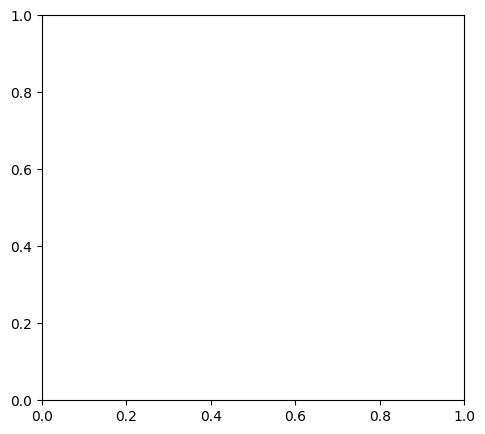

In [9]:
def plot_history (history):
  plt.figure(figsize=(12, 5))

  # 정확도 시각화
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # 손실 시각화
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.title('loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

plot_history(history)

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


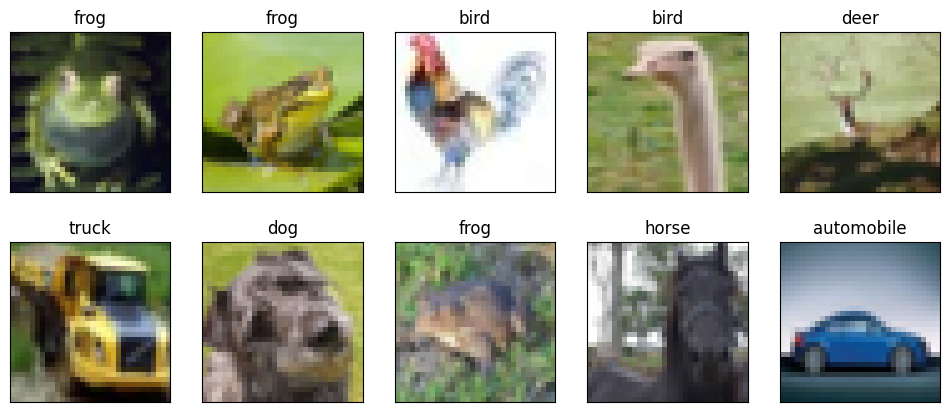

In [2]:
import matplotlib.pyplot as plt


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

samples = np.random.randint(len(X_train), size=10)

plt.figure(figsize=(12, 5))

for i, idx in enumerate(samples):
    plt.subplot(2, 5, i+1, xticks=[], yticks=[])
    plt.title(class_names[y_train[idx][0]])
    plt.imshow(X_train[idx])

plt.show()

In [3]:
# 데이터 전처리: 정규화

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
from tensorflow.keras.utils import to_categorical

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train = y_train.reshape(-1)  # (50000,)으로 평탄화
y_test = y_test.reshape(-1)    # (10000,)으로 평탄화

# 레이블 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (50000, 1)
y_test shape: (10000, 1)
y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [5]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

# Conv2D + MaxPooling2D 레이어
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from tensorflow import keras

adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer = adam,
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train, epochs=100, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - acc: 0.2449 - loss: 2.0210 - val_acc: 0.4868 - val_loss: 1.4582
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.4591 - loss: 1.4742 - val_acc: 0.5229 - val_loss: 1.3223
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.5284 - loss: 1.3113 - val_acc: 0.6020 - val_loss: 1.1113
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - acc: 0.5739 - loss: 1.1996 - val_acc: 0.6379 - val_loss: 1.0274
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.6111 - loss: 1.1006 - val_acc: 0.6585 - val_loss: 0.9701
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.6358 - loss: 1.0413 - val_acc: 0.6916 - val_loss: 0.8924
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.6485 - loss: 0.9992 - val_acc: 0.7030 - val_loss: 0.8609
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.6681 - loss: 0.9445 - val_acc: 0.7129 - val_loss: 0.8234
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8m

In [8]:
def plot_history (history):
  plt.figure(figsize=(12, 5))

  # 정확도 시각화
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # 손실 시각화
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.title('loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

plot_history(history)

NameError: name 'history' is not defined

In [11]:
from google.colab import drive


drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import zipfile

# 경로 설정
zip_path = "/content/drive/MyDrive/Colab Notebooks/sports.zip"
extract_path = "/content/drive/MyDrive/Colab Notebooks/sport"

# 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 압축 해제된 파일 확인
print(os.listdir(extract_path))


['EfficientNetB0-100-(224 X 224)- 98.40.h5', 'sports.csv', 'test', 'train', 'valid']


In [5]:
import os
import cv2

# 폴더 경로 설정
test_folder = "/content/drive/MyDrive/Colab Notebooks/sport/test"
train_folder = "/content/drive/MyDrive/Colab Notebooks/sport/train"
valid_folder = "/content/drive/MyDrive/Colab Notebooks/sport/valid"

# 이미지 및 라벨 리스트 초기화
test_images, test_labels = [], []
train_images, train_labels = [], []
valid_images, valid_labels = [], []

# 클래스 설정
classes = ['baseball', 'basketball', 'tennis', 'boxing', 'football', 'golf', 'fencing', 'surfing', 'volleyball', 'swimming']

# 이미지와 라벨을 로드하는 함수 (OpenCV와 리사이즈 포함)
def load_and_resize_images_and_labels(base_folder, classes_list, target_size=(128, 128)):
    images, labels = [], []
    for class_name in classes_list:
        class_folder = os.path.join(base_folder, class_name)
        if os.path.exists(class_folder):
            for image_file in os.listdir(class_folder):
                if image_file.endswith('.jpg'):
                    image_path = os.path.join(class_folder, image_file)
                    # 이미지 로드 및 리사이즈
                    image = cv2.imread(image_path)
                    if image is not None:  # 이미지 로드 성공 여부 확인
                        resized_image = cv2.resize(image, target_size)
                        images.append(resized_image)
                        labels.append(class_name)  # 라벨 추가
    return images, labels

# 각 데이터셋에서 이미지와 라벨 로드
test_images, test_labels = load_and_resize_images_and_labels(test_folder, classes)
train_images, train_labels = load_and_resize_images_and_labels(train_folder, classes)
valid_images, valid_labels = load_and_resize_images_and_labels(valid_folder, classes)

# 결과 확인
print(f"Test images: {len(test_images)}, Test labels: {len(test_labels)}")
print(f"Train images: {len(train_images)}, Train labels: {len(train_labels)}")
print(f"Valid images: {len(valid_images)}, Valid labels: {len(valid_labels)}")

# 데이터 예시 출력
print(f"Example test image shape: {test_images[0].shape}, label: {test_labels[0]}")
print(f"Example train image shape: {train_images[0].shape}, label: {train_labels[0]}")
print(f"Example valid image shape: {valid_images[0].shape}, label: {valid_labels[0]}")


Test images: 50, Test labels: 50
Train images: 1514, Train labels: 1514
Valid images: 50, Valid labels: 50
Example test image shape: (128, 128, 3), label: baseball
Example train image shape: (128, 128, 3), label: baseball
Example valid image shape: (128, 128, 3), label: baseball


In [6]:
# 데이터 전처리

import numpy as np

# 이미지를 NumPy 배열로 변환
test_images = np.array(test_images, dtype='float32') / 255.0  # 정규화
train_images = np.array(train_images, dtype='float32') / 255.0
valid_images = np.array(valid_images, dtype='float32') / 255.0

# 라벨을 클래스 인덱스로 변환
label_to_index = {label: idx for idx, label in enumerate(classes)}
test_labels = np.array([label_to_index[label] for label in test_labels])
train_labels = np.array([label_to_index[label] for label in train_labels])
valid_labels = np.array([label_to_index[label] for label in valid_labels])

In [7]:
# 데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강 생성기
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 증강 데이터를 훈련 데이터에 적용
datagen.fit(train_images)


In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

# Conv2D + MaxPooling2D 레이어
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.3))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from tensorflow import keras

adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer = adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=100,
                    validation_data=(valid_images, valid_labels))


test_loss, test_acc = model.evaluate(test_images, test_labels)
print(model.summary())
print('Test accuracy:', test_acc)

Epoch 1/100


KeyboardInterrupt: 

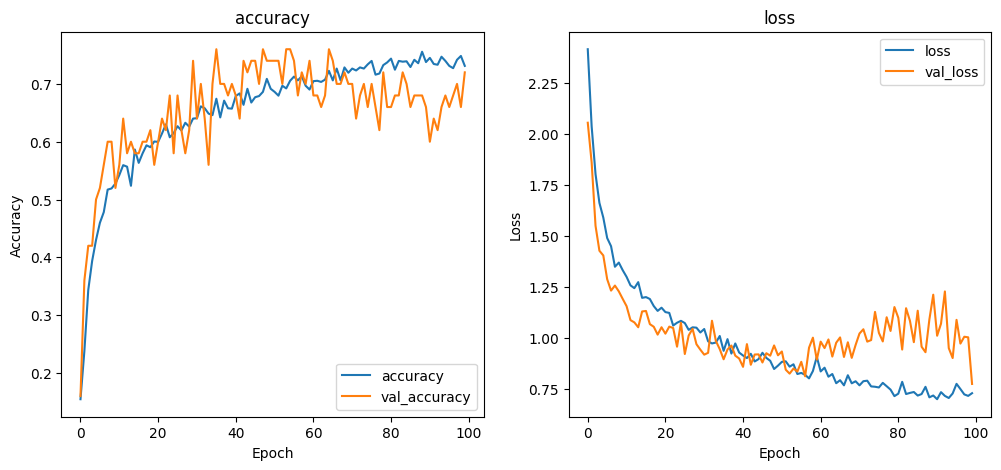

In [10]:
import matplotlib.pyplot as plt

def plot_history (history):
  plt.figure(figsize=(12, 5))

  # 정확도 시각화
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # 손실 시각화
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.title('loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

plot_history(history)